In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [48]:
df = pd.read_csv("./heart.csv")

# Heart Analysis

## Business understanding

Here we have a dataset with interesting data. We have information about patient with chances of having heart attack or not, with some interesting information about their age, sex etc. The dataset is open source and can be found on kaggle: https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

The questions I am interesting with are the following:

1. Is the cholestherol really increase the risk of doing a heart attack  ?
2. Are the age and the sex determinant factors of risks ?
3. Can we predict chances to do heart attacks ?

## Data Understanding

In [49]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


We have 303 rows with 14 columns. Every column looks to have numeric values.

In [50]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


The mean age is 54, and the min is 29. It would have been interesting to get a larger age difference between min and max, but this is already interesting enough

## Data preparation and analysis

Before starting, lets see if we have missing values

In [51]:
df.isnull().any()

age         False
sex         False
cp          False
trtbps      False
chol        False
fbs         False
restecg     False
thalachh    False
exng        False
oldpeak     False
slp         False
caa         False
thall       False
output      False
dtype: bool

No missing values in this dataframe, let's start answering our questions

### Is the cholesterol a key indicator of heart attacks ?

In [52]:
df.chol

0      233
1      250
2      204
3      236
4      354
      ... 
298    241
299    264
300    193
301    131
302    236
Name: chol, Length: 303, dtype: int64

In [53]:
mean_cho_0 = df[df.output == 0].chol
mean_cho_0.describe()

count    138.000000
mean     251.086957
std       49.454614
min      131.000000
25%      217.250000
50%      249.000000
75%      283.000000
max      409.000000
Name: chol, dtype: float64

In [54]:
mean_cho_1 = df[df.output == 1].chol
mean_cho_1.describe()

count    165.000000
mean     242.230303
std       53.552872
min      126.000000
25%      208.000000
50%      234.000000
75%      267.000000
max      564.000000
Name: chol, dtype: float64

Cholesterol doesn't look like a signicative impacter for the heart attack, at least in this dataset. Let's try to plot a swarm plot for a better visualization

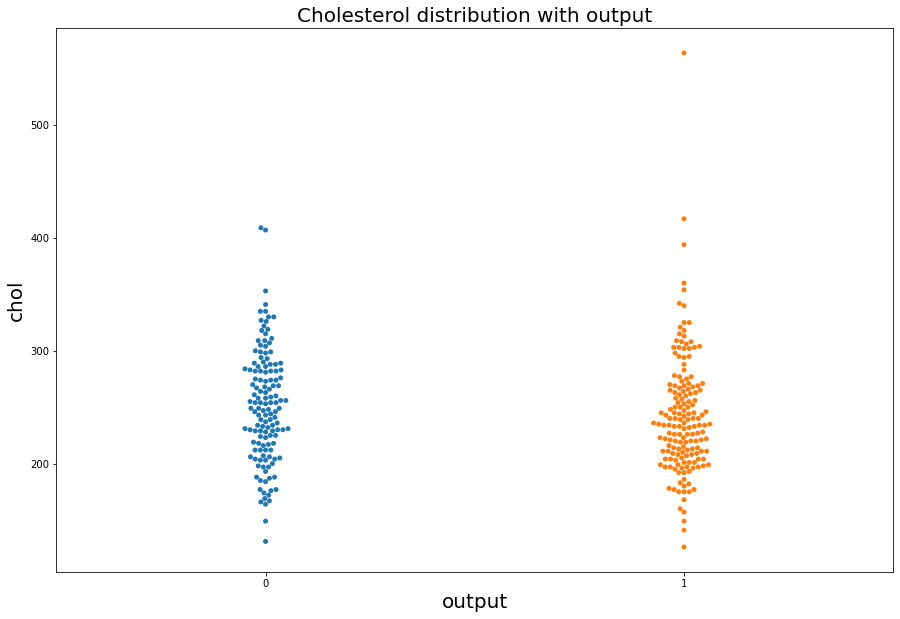

In [55]:
def swarm_plot(df, x_col, y_col, fontsize=15):
    """ Used to draw a swarm plot 
    INPUTS:
    -------
        df : pandas Dataframe
            The dataframe you are working with
        x_col : str 
            The name of the column to put on the x axis
        y_col: str
            The name of the column to put on the x axis
        fontsize: int
            The size of the title font
            
    """
    
    plt.figure(figsize=(15, 10))
    plt.rc('axes', labelsize=20)
    plt.title("Cholesterol distribution with output", fontsize=20)
    sns.swarmplot(data=df, x=x_col, y=y_col)
    

swarm_plot(df, "output", "chol")
plt.show()

As we thought, in this dataset the cholesterol is not a key indicator of a heart attack. We might need more sample to conclude

### Are the age and the sex determinant factors of risks ?

First, let's see our age and Male/Female distribution

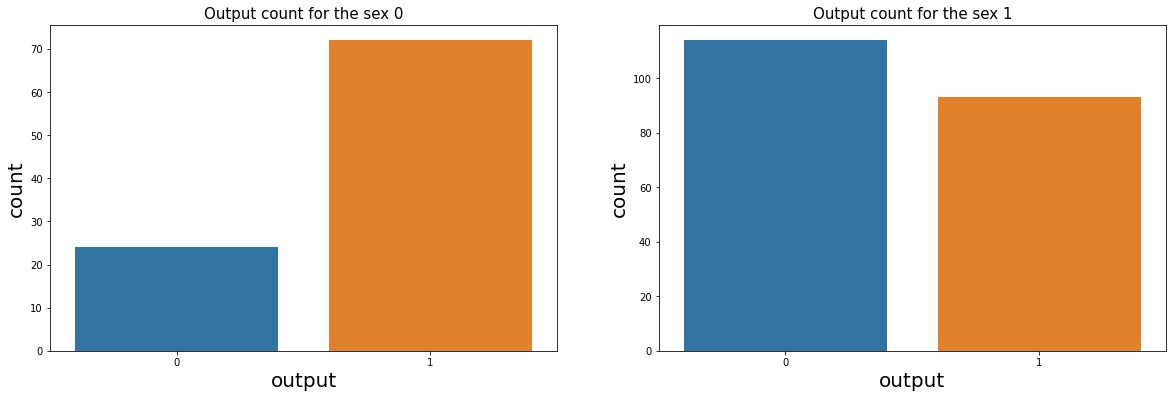

In [56]:
def plot_cout_bar_charts(df, x_col, titles, fontsize=15):
    """ Plot our bar charts on multiple axes
    
    INPUTS:
    -------
        df: pandas Dataframe
            The dataframe you want to work with
        x_col: str
            The name of the column to put on the x axis
        titles: list(str)
            The titles to use for the plot
        fontsize: int
            The size of the title font 
    
    """
    
    fig, ax1 = plt.subplots(1,2, figsize=(20,6))
    for i, title in enumerate(titles):
        sns.countplot(x=x_col, data=df[df.sex == i], ax=ax1[i])
        ax1[i].set_title(title, fontsize=fontsize)
    
plot_cout_bar_charts(df=df, x_col="output", titles=["Output count for the sex 0", "Output count for the sex 1"])
plt.show()

The sex "0" looks much more impacted by heart diseas than the sex 1

Now let's look at the age variable

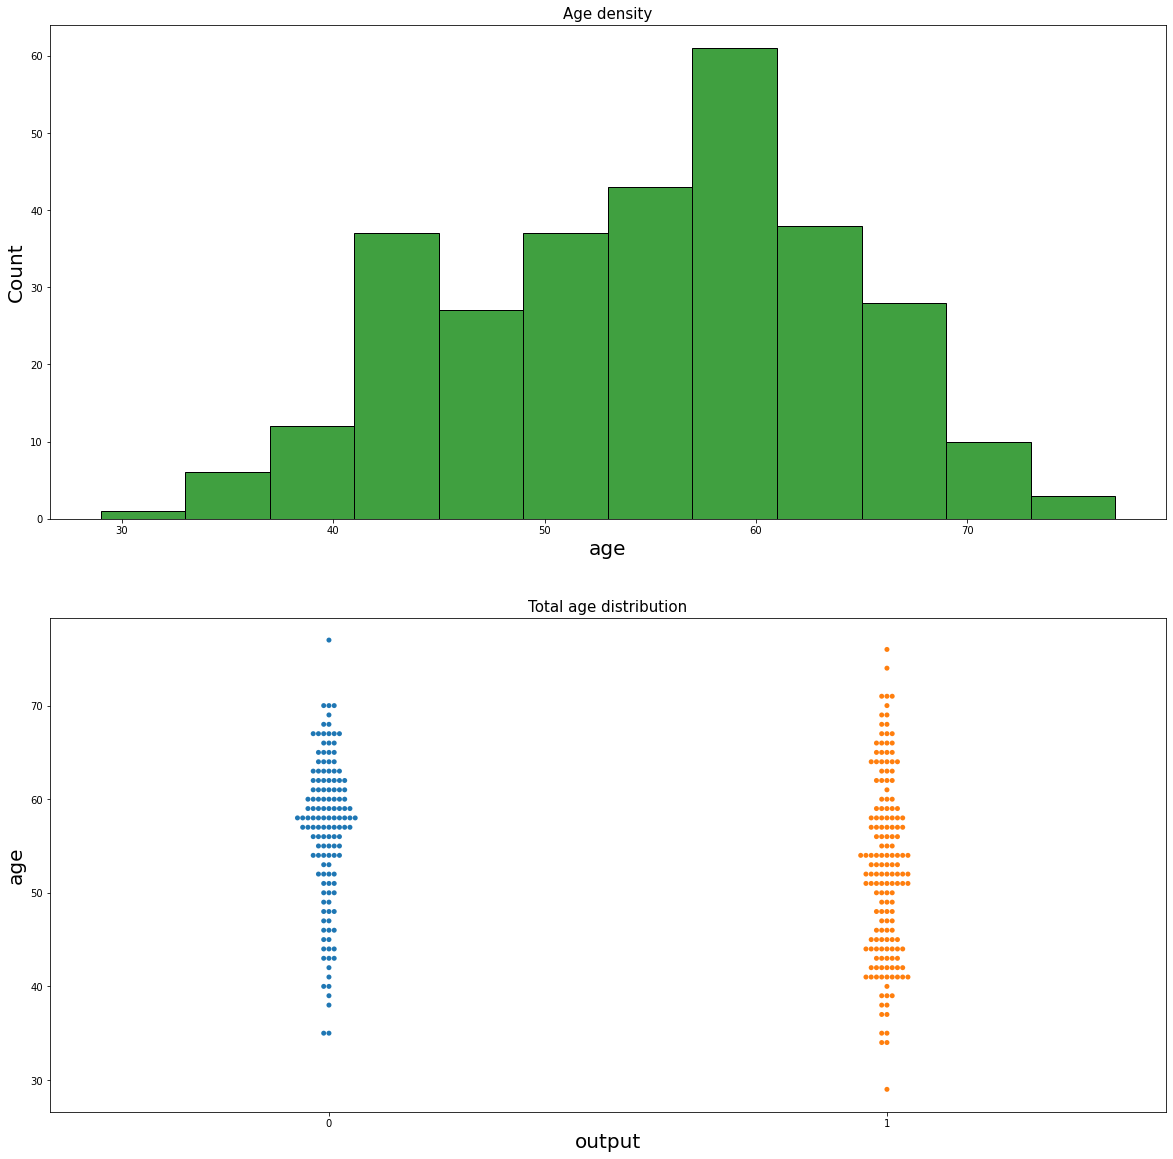

In [57]:
def plot_age_density_and_distribution(df, x_col, y_col, titles, fontsize=15, figsize=(20, 20)):
    """ Plot the age density and the distribution based on output
    
    INPUTS:
    -------
        df: pandas Dataframe
            The dataframe you want to work with
        x_col: str
            The name of the column to put on the x axis
        y_col: str
            The name of the column to put on the y axis (for the swarm_plot)
        titles: list(str)
            The titles to use for the plot
        fontsize: int
            The size of the title font 
        figsize: tupe(int)
            The size of the figure you want to draw
    """
    fig, ax1 = plt.subplots(2,1, figsize=figsize)
    # plot the age density
    ax1[0].set_title(titles[0], fontsize=fontsize)
    sns.histplot(df[y_col], color="green", bins="auto", ax=ax1[0])
    
    # pot the age distribution
    ax1[1].set_title(titles[1], fontsize=fontsize)
    sns.swarmplot(data=df, x=x_col, y=y_col, ax=ax1[1])

plot_age_density_and_distribution(df=df, x_col="output", y_col="age", titles=["Age density", "Total age distribution"])  
plt.show()


Surprisingly, the age doesn't play a significative role here

## Can we predict chances to get heart attacks ?

It is time to try predicting chances of having a heart attack

Fisrt let's see the correlation in this dataset

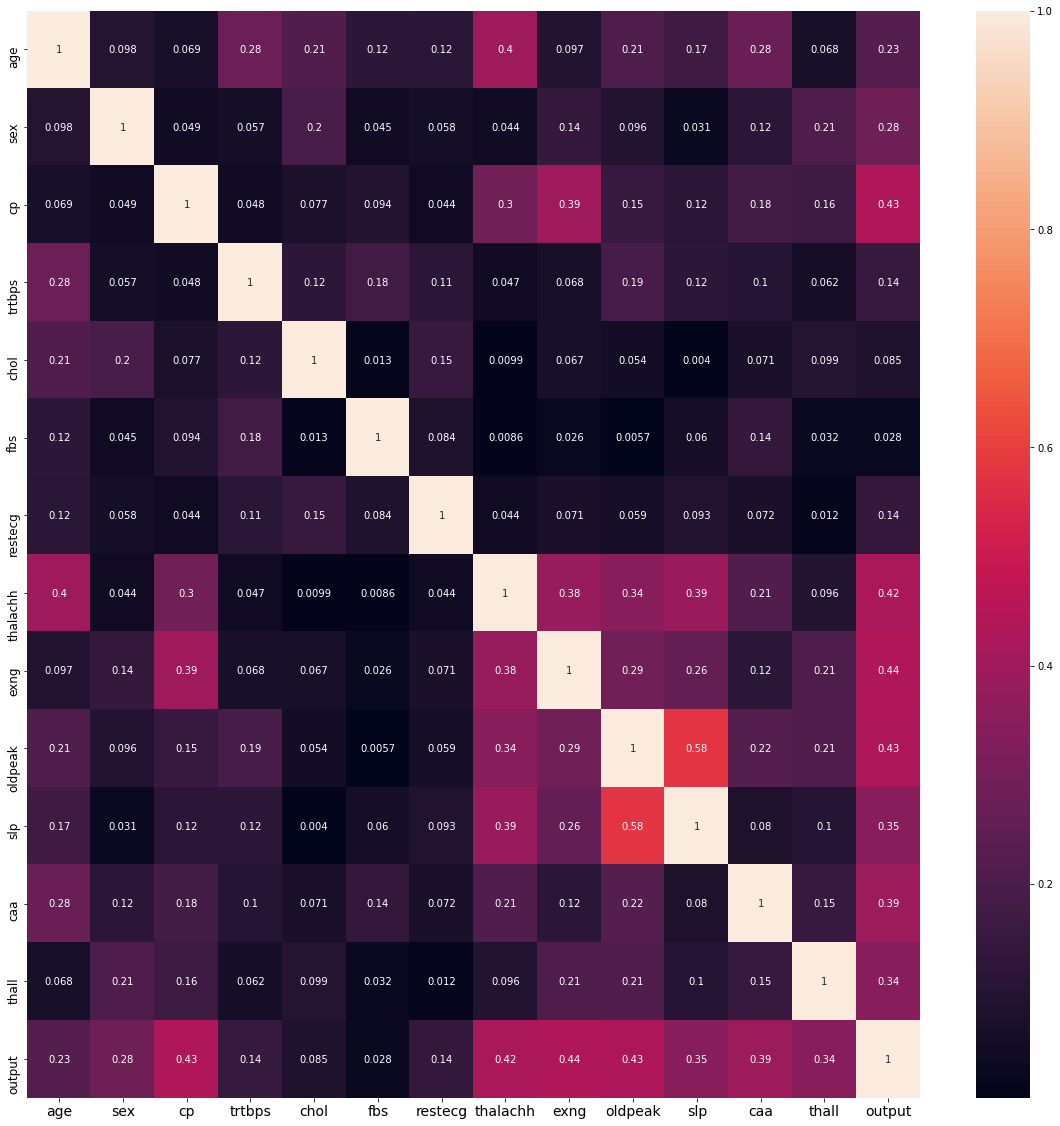

In [58]:
def plot_heatmap_corr(df, xfont=14, yfont=12, figsize=(20, 20)):
    """ Plot the heatmap of correlations of each features
    
    INPUTS:
    -------
        df: pandas Dataframe
            The dataframe you want to work with
        xfont: int
            The size of tick labels on the x axis 
        yfont: int
            The size of tick labels on the y axis
        figsize: tupe(int)
            The size of the figure you want to draw
    """
    plt.figure(figsize=figsize)
    hm = sns.heatmap(abs(df.corr()), annot=True)
    hm.set_xticklabels(hm.get_xmajorticklabels(), fontsize = xfont)
    hm.set_yticklabels(hm.get_ymajorticklabels(), fontsize = yfont)

plot_heatmap_corr(df)
plt.show()

Now let's predict. For this I wanna try a random forest classifier

In [59]:
X = df.drop("output", axis=1)
y = df.output

def pre_processing(X, y, test_size=0.2, random_state=65):
    """ Pre processing step. Split into train and test sets and apply normalization
    
    INPUTS:
    -------
        X: pandas Dataframe
            The dataframe with all the features to use
        y: pandas Series
            The target variable
        test_size: float
            The size of the test size (Between 0 and 1)
        random_state: int
            The random state to apply
    
    RETURNS:
    --------
        X_train: pandas Daframe
            The train normalized features dataframe
        X_test: pandas Daframe
            The test normalized features dataframe
        y_train: pandas Series
            The train target dataframe
        y_test: pandas Series
            The test target dataframe
    """
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    mmSc = MinMaxScaler()
    X_train = mmSc.fit_transform(X_train)
    X_test = mmSc.fit_transform(X_test)

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = pre_processing(X, y)

In [60]:
def train_model(n_estimators=550, random_state=10, max_depth=100):
    """ Create and train the model. Here a random forest classifier
    
    INPUTS:
    -------
        n_estimators: int
        random_state: int
        max_depth: int
    """
    rfc = RandomForestClassifier(n_estimators=n_estimators, random_state=random_state, max_depth=max_depth)
    rfc.fit(X_train, y_train)
    return rfc

rfc = train_model()
print("The precision is: ", rfc.score(X_test, y_test))

The precision is:  0.9016393442622951


The model has a precision of 90%. Let's see the most important features

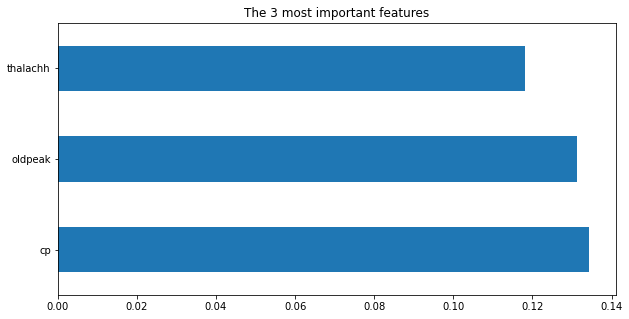

In [61]:
def most_import_features(model, columns, figsize=(10, 5), nlargest=3):
    """ Draw a bar chart of the n most important features
    
    INPUTS:
    --------
        model: sklearn Model
            The model you trained
        columns: pandas Index
            The index of the columns from the dataframe
        figsize: tuple(int)
            The size of the figure to draw
        nlargest: int
            The n more used features to show
    """

    plt.figure(figsize=figsize)
    plt.title(f"The {nlargest} most important features")
    (pd.Series(model.feature_importances_, index=columns)
       .nlargest(nlargest)
       .plot(kind='barh'))

most_import_features(rfc, X.columns)
plt.show()

So the most important features are:
 - cp: Which is the chest pain type
 - oldpeak: Which is the presence of an old peak of heart diseas
 - thalach: Maximum heart rate achieved

## Results

To conclude we saw that:
 1. The cholesterol was not a key indicator of chances of having a heart attack
 2. The sex was a key indicator but not the age
 3. The 3 most important features for predicting heart attakc.

However, keep in mind this was just a small dataset. For example, I keep thinking the age is an important feature even if in this dataset it was not. In order to get a more relevant model, we should have a much longer dataset with a better repartition !